In [36]:
# !pip install gym==0.21.0
# !pip install pyglet==1.5.27
import gym
import random
import numpy as np
from matplotlib import pyplot as plt

# Confused Agent

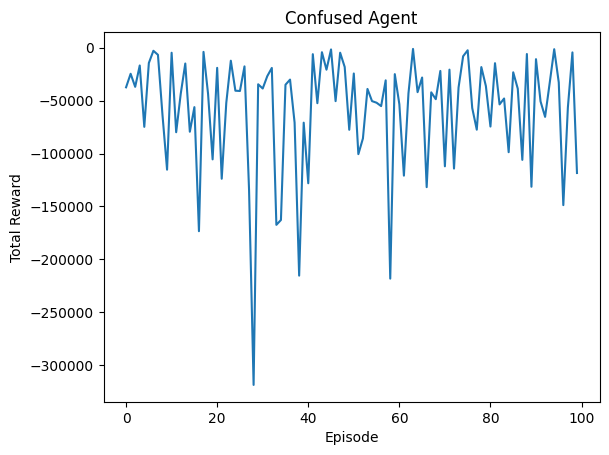

In [37]:
"""
Creating Confused Agent
"""
def confused_agent(env_name):
    env = gym.make(env_name)
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        total_reward += reward
        # env.render()
        #when we reach goal, we reset the environment
        if done:
            obs = env.reset()
    env.close()
    return total_reward

#we run the agent 100 times
confused_agent_total_rewards = []
for i in range(100):
    confused_agent_total_rewards.append(confused_agent("CliffWalking-v0"))
    
plt.plot(confused_agent_total_rewards)
plt.title("Confused Agent")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()


### Analysis:
Random rewards across the iterations

# Value Iteration

In [46]:
def policy_to_arrows(policy):
    arrows = []
    for action in policy:
        if action == 0:
            arrows.append("↑")
        elif action == 1:
            arrows.append("→")
        elif action == 2:
            arrows.append("↓")
        elif action == 3:
            arrows.append("←")
    return np.array(arrows).reshape(4,12)

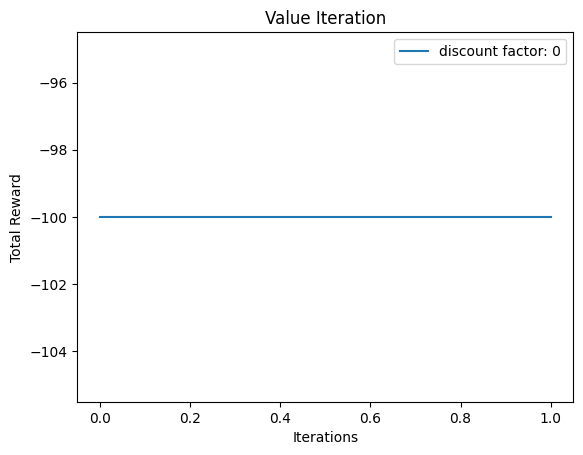

Directions of the optimal policy:
[['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


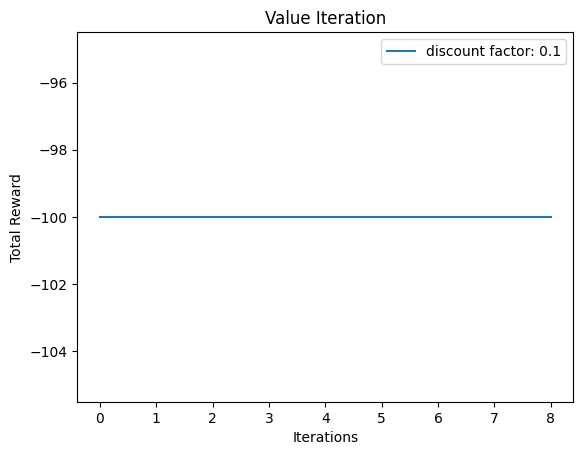

Directions of the optimal policy:
[['↑' '↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


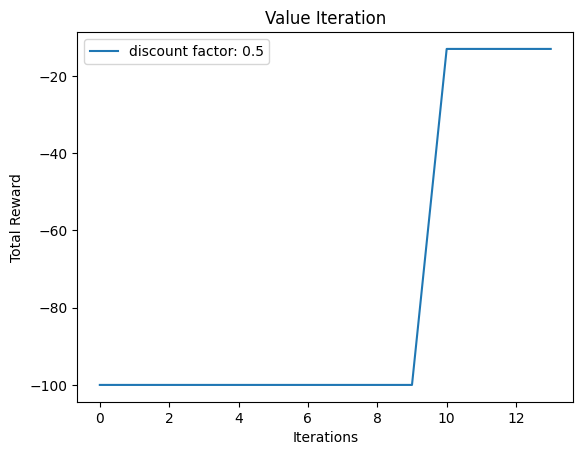

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


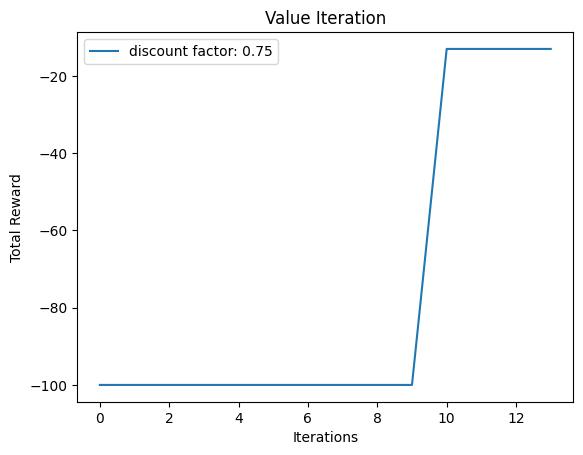

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


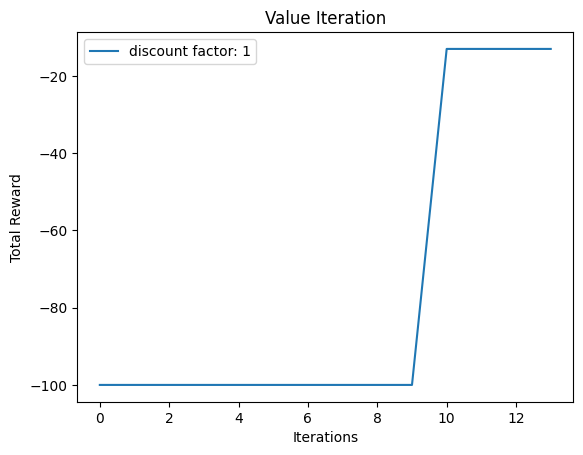

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


In [49]:
class ValueIterationAgent:
    """
    Value Iteration Agent
    """
    def __init__(self, env_name, discount_factor=0.5, theta=1e-8):
        self.env = gym.make(env_name)
        self.discount_factor = discount_factor
        self.theta = theta
        #value function to calculate the value of a given state
        self.V = np.zeros(self.env.nS)
        #policy to map every state to an action
        self.policy = np.random.randint(0, self.env.nA, size=(self.env.nS))

    def run(self):
        #we run the agent in the environment
        obs = self.env.reset()
        done = False
        total_reward = 0
        steps = 0
        while not done and steps < 100:
            action = self.policy[obs]
            obs, reward, done, info = self.env.step(action)
            total_reward += reward
            #self.env.render()
            #when we reach goal, we reset the environment
            if done:
                obs = self.env.reset()
            steps += 1
        self.env.close()
        return total_reward
    
    def perform_value_iteration(self):
        rewards = []
        for i in range(100):
            delta = 0
            for s in range(self.env.nS):
                v = self.V[s]
                self.V[s] = np.max([sum([p*(r + self.discount_factor*self.V[s_] + 1*_) for p, s_, r, _ in self.env.P[s][a]]) for a in range(self.env.nA)])
                delta = max(delta, abs(v - self.V[s]))
            #update the policy based on the updated value function
            for s in range(self.env.nS):
                self.policy[s] = np.argmax([sum([p*(r + self.discount_factor*self.V[s_] + 1*_) for p, s_, r, _ in self.env.P[s][a]]) for a in range(self.env.nA)])
            #calculate the rewards for the updated policy
            rewards.append(self.run())
            if delta < self.theta:
                break
        return self.policy, self.V, rewards


for discount in [0, 0.1, 0.5, 0.75, 1]:
    agent = ValueIterationAgent("CliffWalking-v0", discount_factor=discount)
    policy, V, rewards = agent.perform_value_iteration()
    plt.plot(rewards, label=f"discount factor: {discount}")
    plt.title("Value Iteration")
    plt.xlabel("Iterations")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.show()
    print("Directions of the optimal policy:")
    print(policy_to_arrows(policy))
    print("-----------------------------")

        

### Analysis:
We can clearly see that from $\alpha=0$ to $\alpha=0.1$, the policy is changing as seen in the arrow directions, showing that there is learning happening. However, the rewards remain the same.

From $\alpha=0.5$ to $\alpha=1$, the rewards and the policy remains the same. 

# Policy Iteration

In [40]:
def policy_to_arrows(policy):
    arrows = []
    for action in policy:
        if action == 0:
            arrows.append("↑")
        elif action == 1:
            arrows.append("→")
        elif action == 2:
            arrows.append("↓")
        elif action == 3:
            arrows.append("←")
    return np.array(arrows).reshape(4,12)

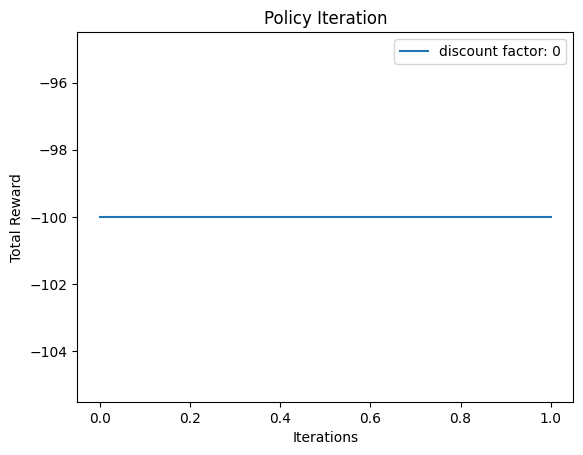

Directions of the optimal policy:
[['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


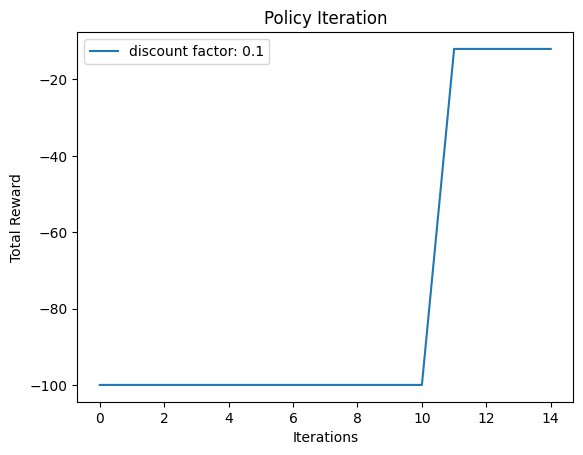

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


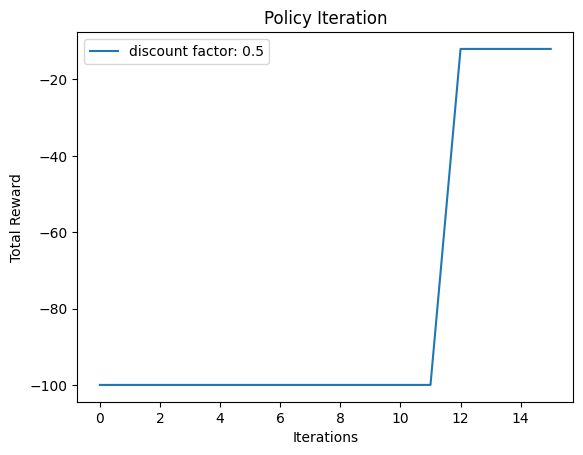

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


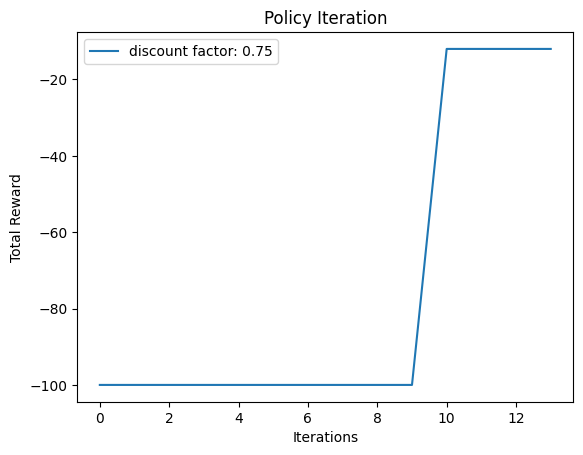

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


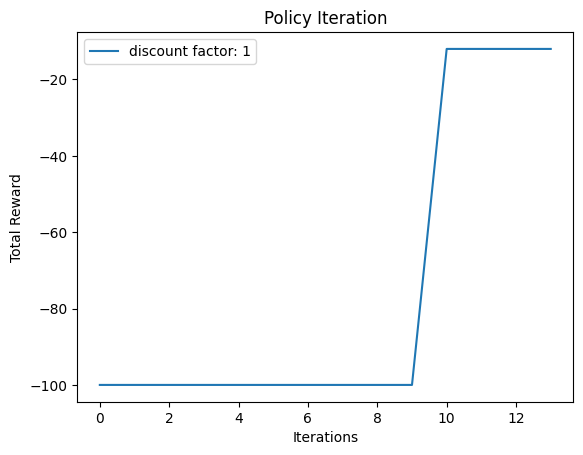

Directions of the optimal policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→']]
-----------------------------


In [42]:
class PolicyIterationAgent:
    """
    Learns optimal policy by maximizing the long-term reward.
    We map every possible action to every possible state.
    """
    def __init__(self, env_name, discount_factor=0, theta=1e-8):
        self.env = gym.make(env_name)
        self.discount_factor = discount_factor
        self.theta = theta
        #value function to calculate the value of a given state
        self.V = np.zeros(self.env.nS)
        #policy to map every state to an action
        self.policy = np.random.randint(0, self.env.nA, size=(self.env.nS))

    def policy_evaluation(self):
        """
        Evaluates the value function for a given policy
        """
        for _ in range(100):
            delta = 0
            for state in range(self.env.nS):
                v = self.V[state]
                action = self.policy[state]
                #we calculate the value of a given state
                self.V[state] = sum([prob * (reward + self.discount_factor * self.V[next_state]+ done * 1) for prob, next_state, reward, done in self.env.P[state][action]])
                delta = max(delta, abs(v - self.V[state]))
            if delta < self.theta:
                break

    def policy_improvement(self):
        """
        Improves the policy by calculating the best action for a given state
        """
        policy_stable = True
        for state in range(self.env.nS):
            old_action = self.policy[state]
            #we calculate the best action for a given state
            self.policy[state] = np.argmax([sum([prob * (reward + self.discount_factor * self.V[next_state]+ done * 1) for prob, next_state, reward, done in self.env.P[state][action]]) for action in range(self.env.nA)])
            if old_action != self.policy[state]:
                policy_stable = False
        return policy_stable
    
    def run(self):
        obs = self.env.reset()
        done = False
        total_reward = 0
        iterations = 0
        while not done and iterations < 100:
            action = self.policy[obs]
            obs, reward, done, info = self.env.step(action)
            total_reward += reward 
            iterations += 1
        if done: 
            total_reward += 1
        return total_reward
    
    def perform_policy_iteration(self):
        policy_stable = False
        rewards = []
        while not policy_stable:
            self.policy_evaluation()
            policy_stable = self.policy_improvement()
            rewards.append(self.run())
        return self.policy, self.V, rewards
    
for discount in [0, 0.1, 0.5, 0.75, 1]:
    agent = PolicyIterationAgent("CliffWalking-v0", discount_factor=discount)
    policy, V, rewards = agent.perform_policy_iteration()
    plt.plot(rewards, label=f"discount factor: {discount}")
    plt.title("Policy Iteration")
    plt.xlabel("Iterations")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.show()
    print("Directions of the optimal policy:")
    print(policy_to_arrows(policy))
    print("-----------------------------")

    



### Analysis:
We can clearly see that for $\alpha=0$, there are few states exhibiting change in direction. However, the overall policy remains same. The rewards graph supports the same.  

From $\alpha=0.1$ to $\alpha=1$, the rewards and the policy keep improving. A slight lesser number of iterations are taken to reach the best policy from $\alpha=0.5$ to $\alpha=0.75$. 